In [1]:
pip install --upgrade pandas numpy openpyxl
pip install --upgrade numpy statsmodels

Requirement already up-to-date: pandas in ./opt/anaconda3/lib/python3.8/site-packages (2.0.3)
Requirement already up-to-date: numpy in ./opt/anaconda3/lib/python3.8/site-packages (1.24.4)
Requirement already up-to-date: openpyxl in ./opt/anaconda3/lib/python3.8/site-packages (3.1.5)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import scipy
from scipy.stats import norm
from scipy import stats as st
import seaborn as sns
import statsmodels.api as sm

# Preliminary data analysis

In [5]:
path_to_file = 'Grocery Database.xlsx'
df = pd.read_excel(path_to_file)

__Data shape overview__

In [18]:
df.shape
print(f'The set contains {df.shape[0]} rows and {df.shape[1]} columns.')

The set contains 50447 rows and 32 columns.


__Let us review the data types in the dataset__

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

__Let us check whether the data set has missing values__


In [20]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

There are no missing values in the data set.

# Main part of data analysis

__1: What is the most common way of payment among costumers?__


In [21]:
df['Payment Mode'].value_counts()

Payment Mode
Card      17149
Wallet    16867
Cash      16431
Name: count, dtype: int64

__Conclusion__: We can see that the most popular way of payment among customesr is card.

__Business idea__: One can develop a mobile app that allows customers to make contactless payments. This could include features like order-ahead and curbside pickup, creating a convenient and safe shopping experience. 




__2: What are the most commonly purchased product categories?__

In [22]:
df.rename(columns = {'Receipt Number':'Receipt_Number'}, inplace = True)
df.groupby(['Category']).Receipt_Number.count()

Category
Bakery & Breakfast           6770
Beauty                       5205
Beverages                    2208
Choco, Snacks, Sweets        3019
Dairy, Chilled & Eggs        3381
Frozen                       6393
Fruit & Vegetable            4370
Health                       1008
Household                    1881
Kitchen & Dining             2552
Meat & Seafood               2149
Mother & Baby                2064
Party Supplies               1836
Pet Care                     3465
Rice & Cooking Essentials    2432
Wines, Beers & Spirits       1714
Name: Receipt_Number, dtype: int64

__Conclusion__: One sees that the "Bakery and breakfast" is the most purchuased category.

__Business ideas__: 1. Gourmet Breakfast Delivery Service: Create a business that specializes in delivering gourmet breakfast options to people's homes or offices. 

2.Healthy Breakfast Subscription Box: Develop a subscription box service that delivers healthy breakfast options to subscribers each month. Include items like granola, yogurt, whole-grain muffins, and fresh fruits.


__3: What is the average price for the categories?__

In [15]:
df.groupby(['Category']).Price.mean()

Category
Bakery & Breakfast            5.222038
Beauty                       10.063051
Beverages                     8.297360
Choco, Snacks, Sweets         5.770414
Dairy, Chilled & Eggs         6.900683
Frozen                        7.692615
Fruit & Vegetable             5.570590
Health                       13.693046
Household                     8.855045
Kitchen & Dining              3.753100
Meat & Seafood               11.947627
Mother & Baby                11.869695
Party Supplies                4.641950
Pet Care                      6.976049
Rice & Cooking Essentials     3.507113
Wines, Beers & Spirits       13.282456
Name: Price, dtype: float64

__Conclusion__: The highest price is in the "Health" category.

__Business idea__: Beauty Tech: Invest in beauty technology, such as AI-powered skincare analysis or virtual makeup try-on apps. You could provide these services to consumers, helping them find the right products for their skin type and tone.





__4: What are the top-selling products in terms of quantity sold or revenue generated?__

In [25]:
df.rename(columns = {'Profit Margin':'Profit_Margin'}, inplace = True)
df.groupby('Items').Amount.mean().idxmax()

'Bollinger Pink platted moscato rose'

__5: What is the top-selling product category in terms of quantity sold or revenue generated?__

In [26]:
df.groupby('Sub_Category').Amount.mean().idxmax()

'Champagne & Spakling Wine'

__Conclusion (4,5)__: One can see that Bollinger Pink platted moscato rose is the product that generstes the highest revenue. Also, one can see that Champagne & Sparkling Wine is the top-selling producct category.

__Business ideas__: 1.Wine Subscription Service: Launch a subscription service specializing in premium rosé wines, including Bollinger Pink platted moscato Rosé.

2.Wine Tasting Tours: If you're located in a wine-producing region, consider offering wine tasting tours that focus on rosé wines, including a tasting of Bollinger Pink Platted Moscato Rosé. Create unique and immersive experiences by partnering with local wineries for tours and tastings.




__6: Who buy more in the "Frozen" category: men or women?__



In [29]:
gender_counts = df[df['Category'] == 'Frozen']['Gender'].value_counts()
print(gender_counts)

Gender
Female    5401
Male       992
Name: count, dtype: int64


__Conclusion__: There less of male customers in the "Frozen" category.

__Business idea__: Product Placement and Store Layout: Adjust the store layout to prominently display frozen food items that are popular among men. Placing these products in areas that men frequently visit can increase their visibility and encourage more purchases.




__7: At which category do we have the most expensive purchase?__

In [47]:
df.groupby('Membership ID').Price.mean().idxmax()
df.loc[df['Membership ID'] == 'MIDSG0094'].Category

32676    Mother & Baby
Name: Category, dtype: object

__Conclusion__: We have the most expensive purchase in the category: "Mother & Baby".

__Business idea__: Baby Shower Planning Services: Offer event planning services for baby showers, gender reveal parties, and other related celebrations. Create memorable experiences for expectant parents and their friends and family.



__8: At what city customers have the highest average bill?__

In [76]:
df.groupby('City').Amount.mean()

City
Bedok           11.054826
Jakarta         11.310233
Kuala Lumpur    11.262599
Manila          10.822900
Woodlands       11.732765
Name: Amount, dtype: float64

__Conclusion__: In Woodlands customers have the highest average bill.

__Business idea__: Exclusive Cooking Classes:
Organize exclusive cooking classes and workshops that teach customers how to prepare gourmet meals using premium ingredients. Collaborate with renowned chefs or culinary experts to provide a unique and educational experience. Offer classes in-person and online to reach a wider audience.



__9: At what city people have the lowest level of loyalty card points?__

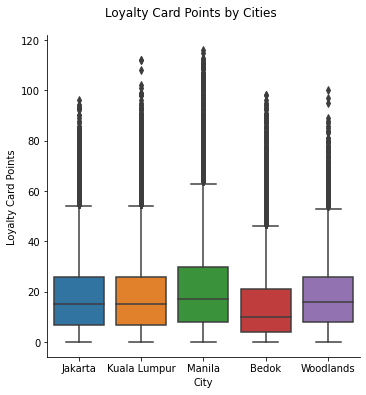

In [19]:
plot = sns.catplot(data = df, x="City", y="Loyalty Card Points", kind="box")
plot.fig.suptitle("Loyalty Card Points by Cities", y=1.05) 
plot

__Conclusion__: In Bedock people have the lowest level of loyalty card points.

__Business idea__: Loyalty Point Boost Program:
Create a loyalty point boosting program specifically for Bedeck grocery stores. 




__Let us create a pivot table__

In [9]:
age_pivot = df.pivot_table(index='Age', columns='City', values='Amount',aggfunc = 'sum')
age_pivot.head()

City,Bedok,Jakarta,Kuala Lumpur,Manila,Woodlands
Age,,,,,
15,2784.5174,2793.6930,1979.3798,2684.6992,1231.9019
16,3723.5775,1839.1363,4214.1807,3890.7314,2529.8478
17,3601.8660,2530.0170,5495.0694,4463.0577,1619.7760
18,4770.9461,3918.6245,4049.1765,3696.5842,2151.6184
19,2830.9589,4447.4399,8208.4761,2224.9030,860.2747


__10: What is the corelation between age and purchase price for every city?__

Text(0.5, 1.0, 'Correlation between Age and Purchase Price')

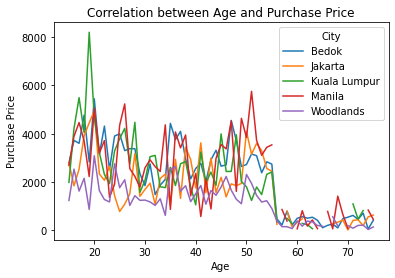

In [16]:
ap = age_pivot.plot()

ap.set_xlabel("Age")  
ap.set_ylabel("Purchase Price")  


ap.set_title("Correlation between Age and Purchase Price") 

__Conclusion__: one sees that in Kuala Lumpur people around 20 make the most expensive purchases. That look suspicious and takes needs some additional reserch to be done.

__11: Is there any correlation between Price and Discount?__

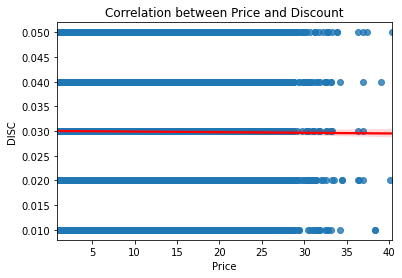

In [25]:
sns.regplot(
    data = df,
    x = 'Price', y='DISC', line_kws = {'color': 'red'}
);
plt.title("Correlation between Price and Discount")
plt.show()


__Conclusion__: There is a direct correlation between Price and Discount. No outliers.

__Let us create another pivot table__


In [6]:
gender_pivot = df.pivot_table(index='Gender', columns='City', values='Amount',aggfunc = 'sum')
gender_pivot.head()

City,Bedok,Jakarta,Kuala Lumpur,Manila,Woodlands
Gender,,,,,
Female,122601.1731,83361.1450,92527.7172,104309.6095,66404.0654
Male,13063.6490,19652.4567,28691.6373,29677.8889,3100.8349


__12: At what city do female customers generate the highest Amount?__

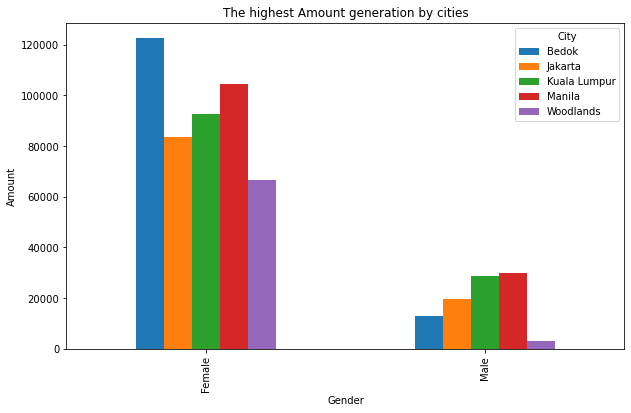

In [7]:
ax = gender_pivot.plot.bar(figsize=(10,6));
ax.set_title("The highest Amount generation by cities")
ax.set_ylabel("Amount")
plt.show()

__Conclusion__: in Bedok female customers generate the highest Amount

__Business ideas__: 1.Inventory and Stocking: If female customers in Bedok prefer specific products, the business can optimize its inventory and stocking decisions. It can ensure that the products favored by this demographic are well-stocked and readily available.

2.Feedback and Surveys: To gain deeper insights into why female customers in Bedok are spending more, the business can conduct surveys or gather feedback. This information can help refine strategies and offerings.

__13: What are the average pre-tax checks for each subcategory in the beauty and care category? Let's create a pie chart and review the structure__

In [7]:
beaty_net_bill = df[df['Category'] == 'Beauty'].groupby('Sub_Category')['Net Bill Amount'].sum()
beaty_net_bill

Sub_Category
Bath & Body     84351.7905
Oral Care      159649.8545
skin care      143328.2248
Name: Net Bill Amount, dtype: float64

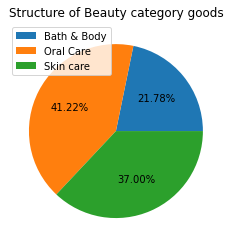

In [9]:
plt.pie(beaty_net_bill, autopct = '%1.2f%%') 
plt.title('Structure of Beauty category goods') 
plt.legend(labels = ['Bath & Body', 'Oral Care', 'Skin care']);


__Conclusion__: The oral care goods have the highest pre-tax checks.
